In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 256
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 2210 		 0.02 		 0.08 |
| 170 		 0.09 		 0.2 |
| 1561 		 0.18 		 0.0 |
| 810 		 0.29 		 0.2 |
| 1267 		 0.18 		 0.35 |
| 899 		 0.42 		 0.07 |
| 5448 		 0.14 		 0.14 |
| 887 		 0.36 		 0.15 |
| 1963 		 0.04 		 0.21 |
| 3519 		 0.05 		 0.07 |
| 1370 		 0.06 		 0.17 |
| 578 		 0.15 		 0.43 |
| 589 		 0.14 		 0.0 |
| 2440 		 0.32 		 0.42 |
| 3973 		 0.35 		 0.1 |
| 528 		 0.22 		 0.18 |
| 1908 		 0.12 		 0.15 |
| 4720 		 0.04 		 0.09 |
| 2581 		 0.35 		 0.21 |
-------------------------------------
The s.d. of M is: 1322.0
The s.d. of E is: 0.15
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 2175
The mean of E is: 0.21
The mean of I is: 0.21
-------------------------------------


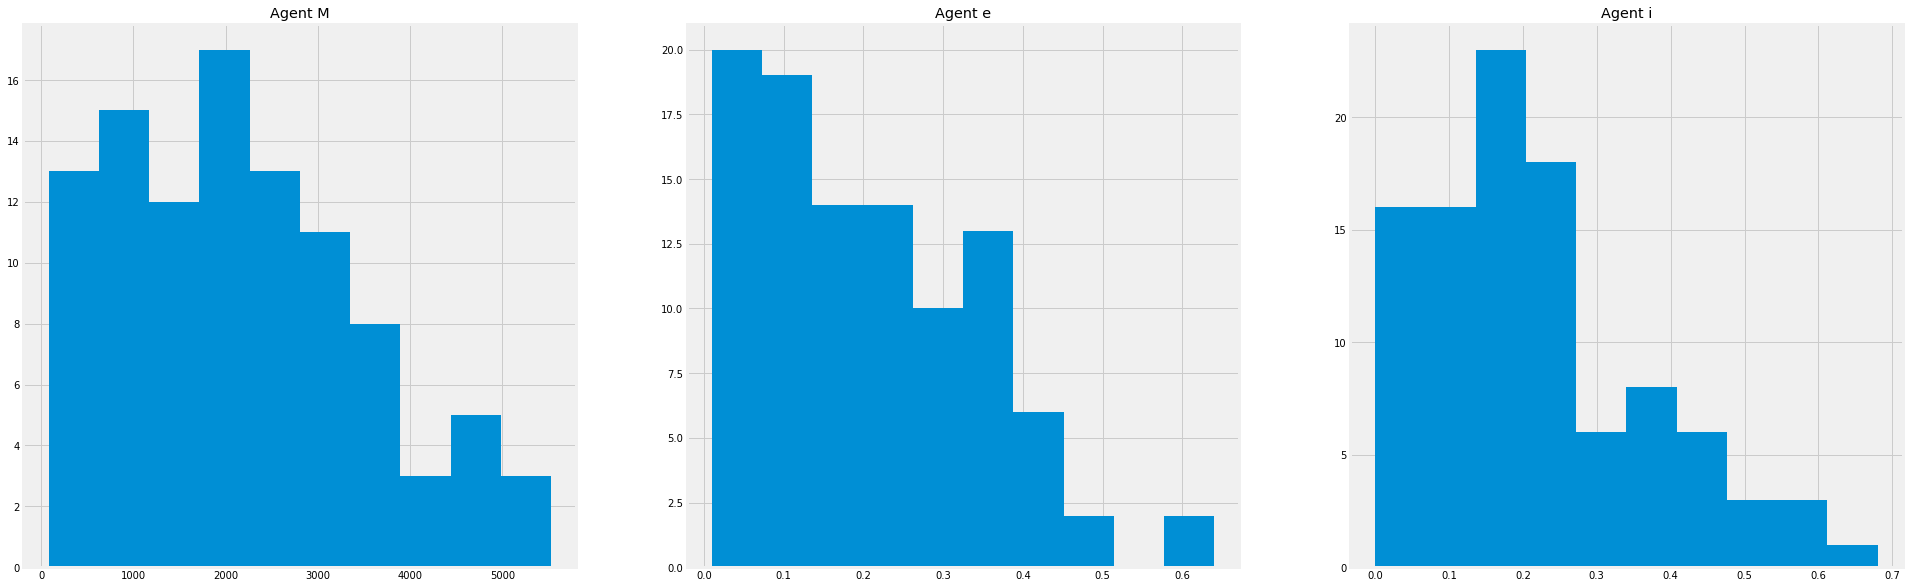

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 2.0, Temptation: 3.0, Sucker: -1.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 190.0, Temptation: 199.0, Sucker: -9.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 9.0, Temptation: 31.0, Sucker: -22.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 398.0, Temptation: 398.0, Sucker: -0.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: -3.0, Temptation: 16.0, Sucker: -19.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 632.0, Temptation: 641.0, Sucker: 

In [2]:
# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 15 minutes.
    S.D.  Counts
0    0.5     237
1    0.6     191
2    0.7     183
3    0.8     156
4    0.9     148
5    1.0     156
6    1.1     125
7    1.2     121
8    1.3     103
9    1.4     100
10   1.5      89
11   1.6      70
12   1.7      55
13   1.8      47
14   1.9      43
15   2.0      38
16   2.1      29
17   2.2      14
18   2.3       9
19   2.4       2
20   2.5       1
21   2.6       0
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


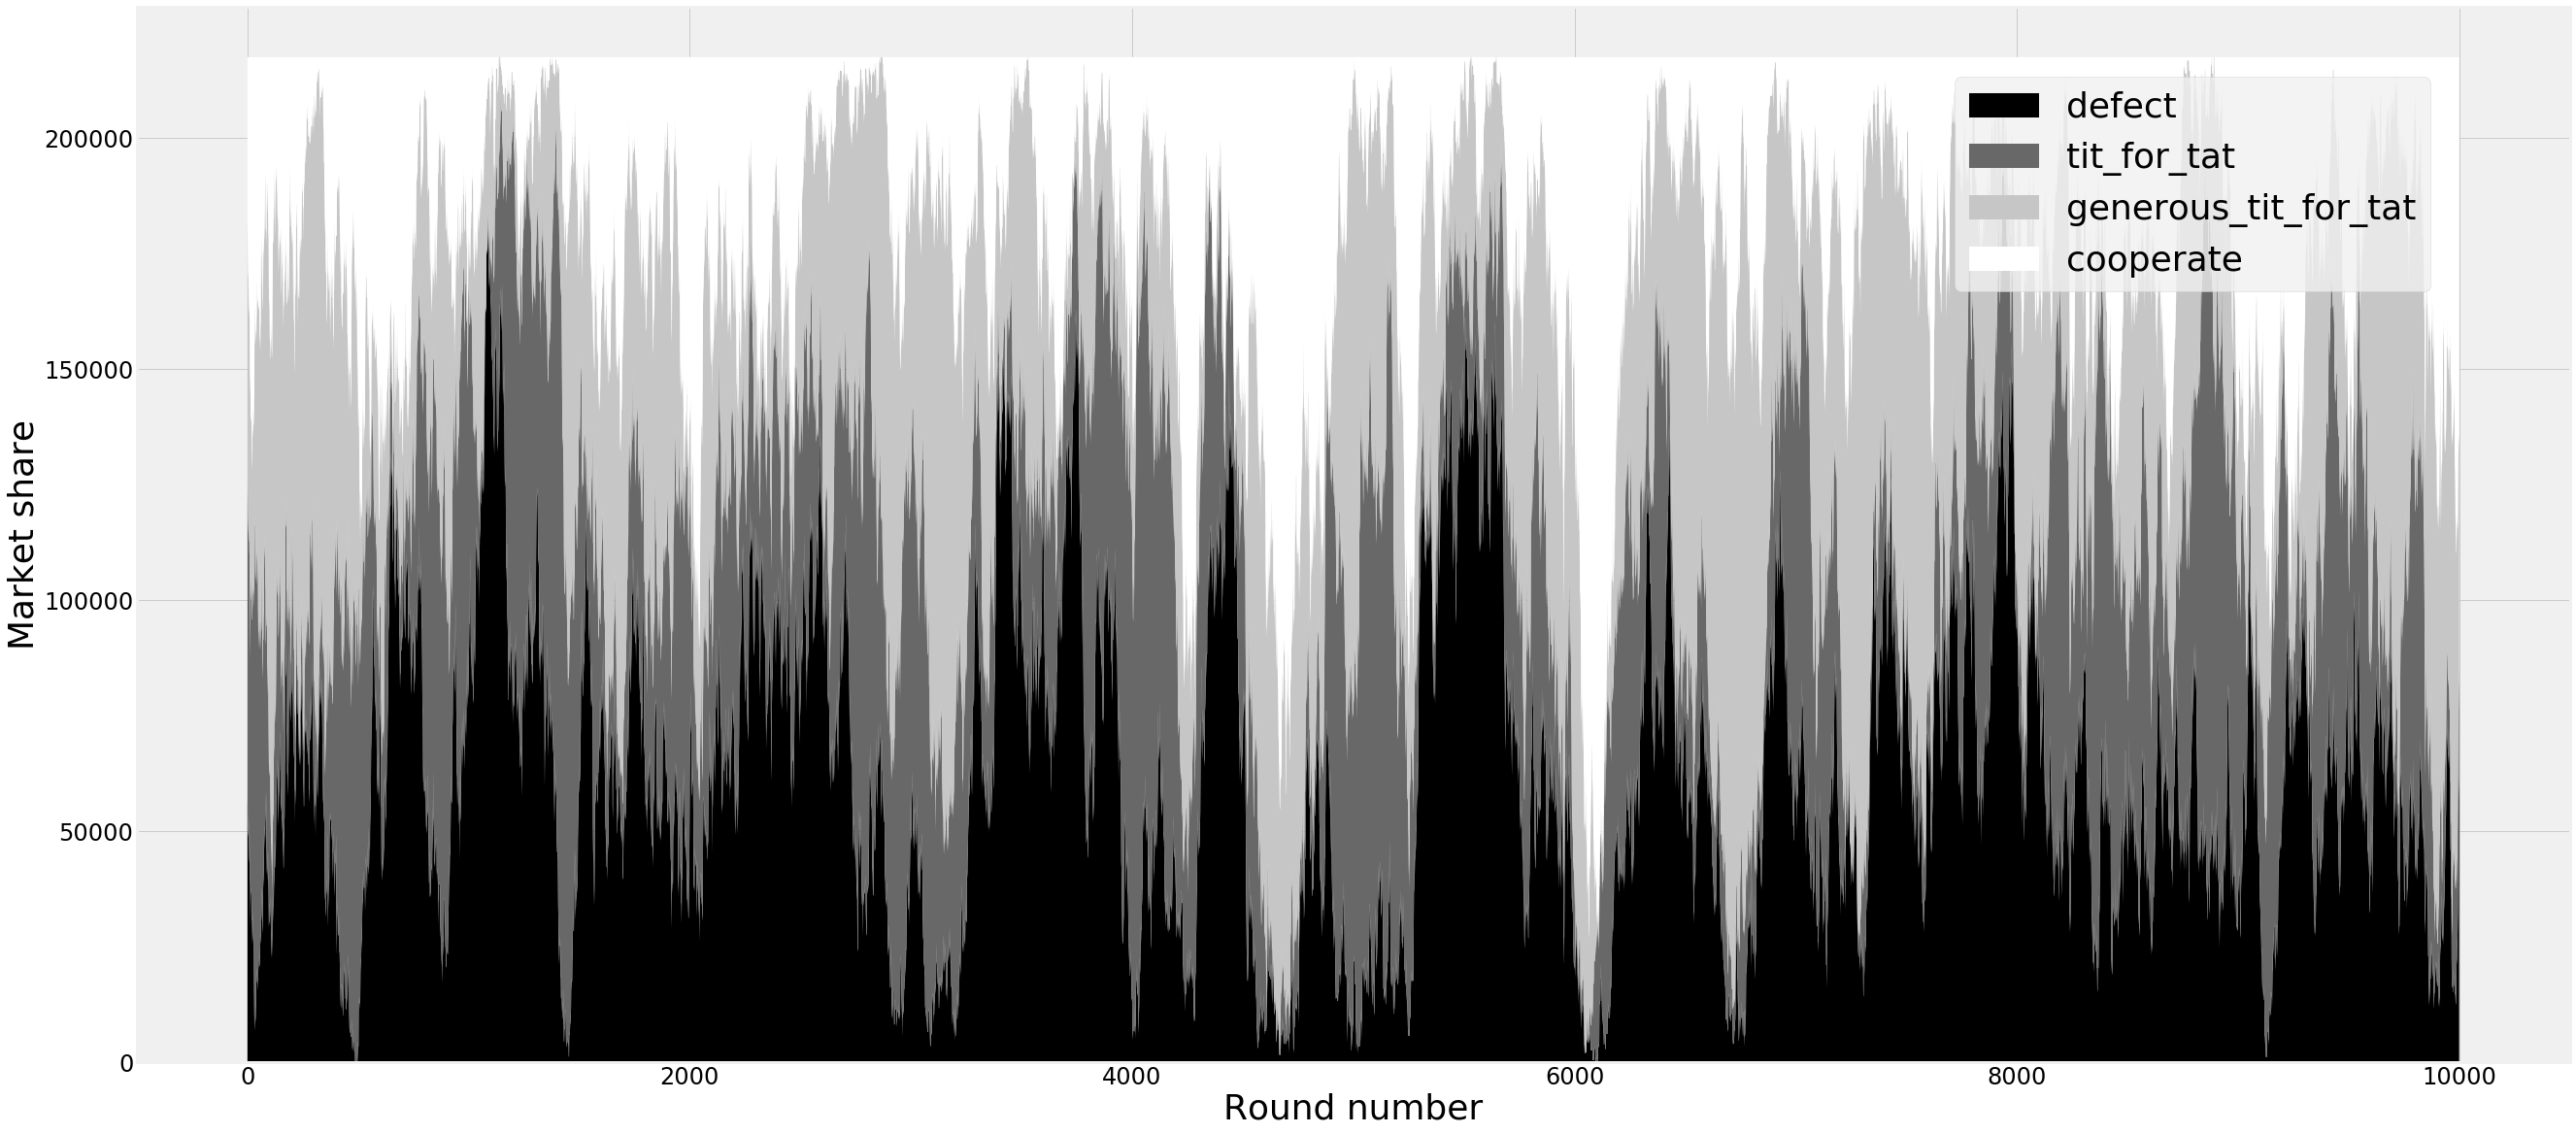

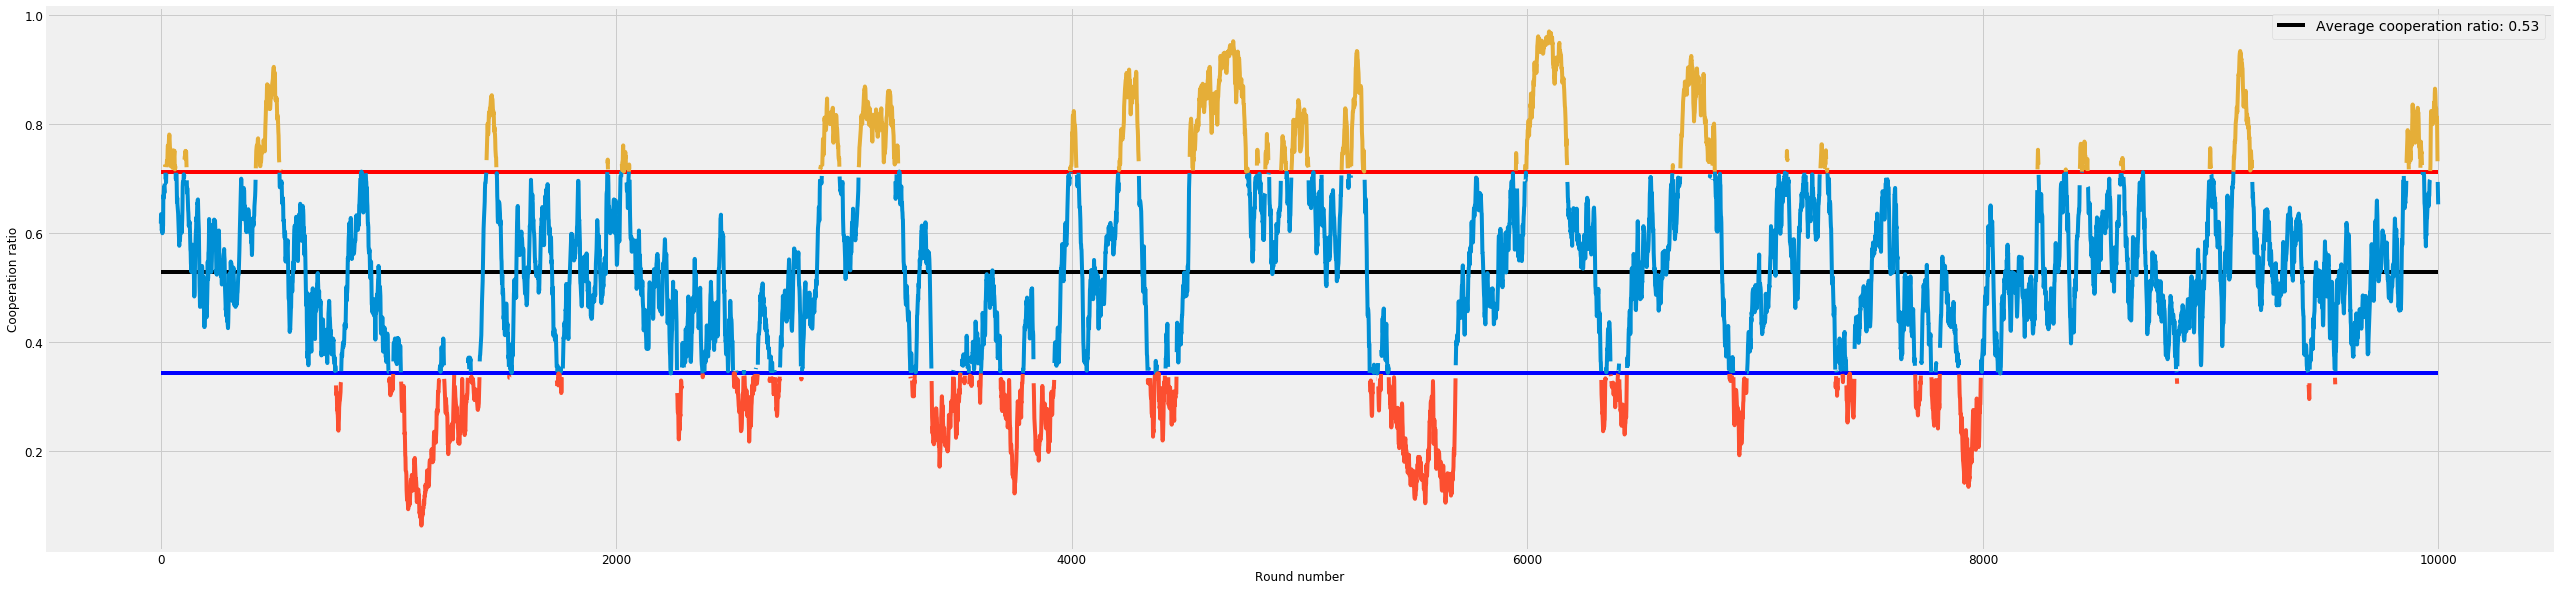

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "complete_heterogeneity", seed = str(seed))